# Final Project Report

* Class: DS 5100
* Student Name: Becky Desrosiers
* Student Net ID: rn7ena
* This URL: https://github.com/oatmeelsquares/rn7ena_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/oatmeelsquares/rn7ena_ds5100_montecarlo/tree/main

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
```

__Die__

```
class Die:
    '''
    A Die object represents a stochastic object with a specified number of faces represented by unique symbols (str or numeric,
    e.g. "H" and "T" for a coin or 1, 2, 3, 4, 5, and 6 for an actual die), each with a weight representing its probability
    of being rolled.

    The object simulates a die (or coin, etc.) by randomly selecting from the faces a specified number of times and returning
    a list of results (e.g. ["H", "H", "T", "H", "T"] for a coin flipped 5x).

    The weights of the faces can be changed to create "unfair" dice.
    '''


    def __init__(self, faces):
        '''
        Purpose:
        Initializes Die object with a specified number of sides (which can represent a coin (2 sides),
        an actual die (6 sides), etc.).

        Inputs:
        faces : numpy array with distinct values representing each face (e.g. array(["Heads", "Tails"])
                for a coin.)

        Outputs:
        Die object with given number of sides and equal weights of 1.0 (a fair coin, die, etc.).
        '''

        # raise TypeError if argument is not a numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("Die must be initialized with a NumPy array.")
        
        # raise ValueEroor if faces are not unique
        if not len(faces) == len(np.unique(faces)):
            raise ValueError("Duplicate faces.")


        # instantiate object faces array and equal weights
        else:
            self._state = pd.DataFrame({
                "Weight" : np.ones(len(faces))},
                index = faces)
            
            self._state.index.name = "Face"

    def change_weight(self, face, new_weight):
        '''
        Purpose:
        Allows the user to change the weight of a given face to make the die "unfair".

        Inputs:
        face       : str or numeric representation of one of the faces
        new_weight : new weight for that side (e.g. new_weight = 5 would make that face 5x more likely to be rolled
                     if no other faces were changed)

        Outputs:
        None (in-place change of Die object's state attribute).
        '''

        # raise IndexError if the face given is not part of the Die
        if face not in self._state.index:
            raise IndexError("No such face.")
        
        # raise TypeError if weight cannot be interpreted as numeric
        try:
            float(new_weight)
        except:
            raise TypeError("New weight must be numeric")
        
        # change weight
        self._state.loc[face, "Weight"] = new_weight


    def roll(self, times=1):
        '''
        Purpose:
        Simulates rolling the die a given number of times, returning a list of outcomes of the rolls without storing
        the results.

        Inputs:
        times : int number of rolls to be recorded

        Outputs:
        outcomes : list of length(times) of the results of the rolls
        '''

        # raise TypeError if times is not an integer
        try:
            int(times)
        except:
            raise TypeError("Argument must be an integer.")
        
        # return a list with times number of values randomlly chosen from the die, with applied weights, without saving in memory
        return list(np.random.choice(self._state.index, size=times, replace=True, p=self._state["Weight"]/self._state["Weight"].sum()))


    def get_state(self):
        '''
        Purpose:
        Safely access the state object of the Die, which holds the names and weights of each face in a pandas data frame.

        Inputs:
        None.

        Outputs:
        state: pandas data frame with names and weights of each face of the Die object.
        '''
        return self._state
```

__Game__

```
class Game():
    '''
    Game object takes one or more dice (of the Die class) with the same number and names of faces and simulates rolling them.  
    '''


    def __init__(self, dice):
        '''
        Purpose:
        Initializes a Game object with a given list of dice.

        Inputs:
        dice : list of Die objects with the same number and labels of faces.

        Outputs:
        Game object with the given dice.        
        '''

        # raise TypeError if the object passed to the initializer is not a list
        if not isinstance(dice, list):
            raise TypeError("Game object must be instantiated with a list.")
        

        for die in dice:
            # raise TypeError if any element of the list is not a Die object
            if not isinstance(die, Die): raise TypeError("Game object must be instantiated with a list of Die objects.")

            # verify the list components are similar dice
            faces = dice[0].get_state().index               # this Index object should hold the same values for every Die in the list
                                                            # This variable will be assigned for each iteration but I think it's worth
                                                            # it for code clarity and it saves me from having to iterate through the
                                                            # list of dice two times
            for i in range(0, len(faces)):
                # raise ValueError if any Die in the list has a different index values
                if die.get_state().index[i] != faces[i]: raise ValueError("Dice must be similar (same number and names of faces).")

        self._dice = dice
        self._last_play = None


    def get_dice(self):
        '''
        Purpose:
        Safely retrieve list of Die objects stored in the Game.

        Inputs:
        None.

        Outputs:
        dice : list of Die objects that the Gmae was instantiated with
        '''

        return self._dice
    

    def get_last_play(self, format = "wide"):
        '''
        Purpose:
        Safely retrieve information on the last game played.

        Inputs:
        format : string "wide" or "narrow" to desribe the shape of the dataframe returned.
                 "wide" or "w" will return the dataframe with row indexes representing Roll # and columns representing Die #.
                 "narrow" or "n" will return the dataframe multi-indexed with level 1 representing Roll # and level 2 representing Die #.

        Outputs:
        last_play : pandas dataframe with results from the last game, in wide or narrow format as specified. Defaults to wide.    
        '''

        if not isinstance(format, str):
            raise TypeError("Argument must be a string")

        inputs = ["narrow", "n", "wide", "w"]

        if format not in inputs:
            raise ValueError("Argument must be string 'narrow' or 'wide'")

        df = self._last_play

        if format == "narrow" or format == "n":
            df = pd.DataFrame(df.stack())
            df.columns = ["Result"]

        return df


    def play(self, times=1):
        '''
        Purpose:
        Simulate gameplay by getting results of a given number of rolls of the dice in the Game. Results are returned and stored in
        the Game object, retrievable with the get_last_play() method. Only the most recent play is recorded; play history is lost.

        Inputs:
        times : int number of rolls in the game. Defaults to 1.

        Outputs:
        results : pandas dataframe of the results of times rolls of the game's dice.        
        '''

        # Raise TypeError if passed a noninteger argument
        if not isinstance(times, int): raise TypeError("Argument must be an integer.")

        # Raise ValueError if passed times < 1
        if times < 1: raise ValueError("Argument must be a positive integer.")

        results = pd.DataFrame([d.roll(times) for d in self._dice])

        # Format the data frame the way we want it
        results = results.transpose(copy = False)
        
        # Set indexes to start at 1
        r, c = results.shape
        results.index = [i + 1 for i in range(0, r)]
        results.columns = [i + 1 for i in range(0, c)]

        # Name indexes appropriately
        results.index.name = "Roll #"
        results.columns.name = "Die #"

        # Update last_play and return results
        self._last_play = results
        return results
```

__Analyzer__

```
class Analyzer():
    '''
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    '''

    def __init__(self, game):
        '''
        Purpose:
        Initializes Analyzer object with a given game.

        Inputs:
        game : Game object to be analyzed.

        Outputs:
        Analyzer object with the given Game.        
        '''

        # Raise ValueError if argument is not a Game object
        if not isinstance(game, Game):
            raise ValueError("Anlyzer must be initialized with a Game object")
        
        # Save state data
        self._game = game
        self._jackpots = None
        self._face_counts = None
        self._combos = None
        self._perms = None


    def get_game(self):
        '''
        Purpose:
        Safely retrieve a copy of the Game object that the Analyzer was initialized with.

        Inputs:
        None.

        Outputs:
        Game object the Analyzer was initialized with.        
        '''

        return self._game
    

    def jackpot(self):
        '''
        Purpose:
        Computes the number of times all Die objects 'rolled' the same face in a single roll, returning an integer value.

        Inputs:
        None.

        Outputs:
        jackpots : int representing number of times all dice rolled the same face.
        '''
        # Only do the calculation the first time
        if self._jackpots == None:

            # Instantiate a counter
            jackpots = 0

            # Iterate over rows of the last_play data frame to see how many unique values
            for value in self._game.get_last_play().nunique(axis = 1):
                # When nunique = 1, that's a jackpot!
                if value == 1: jackpots += 1
            
            # Store state data
            self._jackpots = jackpots

        return jackpots
    

    def face_counts(self):
        '''
        Purpose:
        Computes how many times each face is rolled for each roll in a game, returning a data frame describing the faces rolled
        in the Game.
        
        Inputs:
        None.
        
        Outputs:
        face_counts : pandas DataFrame describing the faces rolled in the Game, with index Roll # and face values as columns.
        '''
        # Return the result if it has already been constructed
        if isinstance(self._face_counts, pd.DataFrame): return self._face_counts

        # Get the results from the Game to work with
        g = self._game.get_last_play()

        # Construct data frame from value counts for each row (Roll #)
        counts = pd.DataFrame([g.loc[i].value_counts() for i in range(1, len(g.index) + 1)])

        # Clean up NaN's and convert to int
        counts = counts.fillna(value = 0).astype(np.int8)

        # Store the result
        self._face_counts = counts
                          
        return self._face_counts
    

    def combo_counts(self):
        '''
        Purpose:
        Computes distinct combinations (regardless of order) of faces rolled and reports them along with their counts in a pandas data frame.
        Distinct combinations are described in a Multiindex with a single column of counts.
        
        Inputs:
        None.
        
        Outputs:
        combos : pandas data frame of all distinct combinations and their counts.
        '''

        # Retreive results if it has already ben calculated
        if isinstance(self._combos, pd.DataFrame): return self._combos
        
        # Get the results from the game to work with sorted so that order doesn't matter
        g = np.sort(self._game.get_last_play().to_numpy(), axis = 1)

        # Standardize order of results (sort along axis 1) and store in hashable tuples      
        results = [tuple(result) for result in g]

        # Construct dictionary of result : count pairs
        d = {}

        for result in results:
            
            # If not in d, add with count 1
            if result not in d:
                d[result] = 1

            # Else increment the count
            else:
                d[result] += 1

        # Store the dictionary as a multiindexed data frame
        self._combos = pd.DataFrame(d.values(), index = d.keys(), columns = ["Counts"])

        return self._combos


        # Multiindex includes faces and counts


    def perm_counts(self):
        '''
        Purpose: Computes the distinct (ordered) permutations of faces rolled and reports them along with their counts in a
        pandas data frame. Distinct combinations are described in a multiindex with a single column of counts.

        Inputs:
        None.

        Outputs:
        perms : pandas data frame of all distinct permutations and their counts.
        '''

        # Retrieve result if it has already been calculated
        if isinstance(self._perms, pd.DataFrame): return self._perms

        # Get results as a list of hashable tuples
        g = self._game.get_last_play().to_numpy()
        results = [tuple(result) for result in g]

        # Construct dictionary of result : count pairs
        d = {}

        for result in results:
            
            # If not in d, add with count 1
            if result not in d:
                d[result] = 1

            # Else increment the count
            else:
                d[result] += 1

        # Store the dictionary as a multiindexed data frame
        self._perms = pd.DataFrame(d.values(), index = d.keys(), columns = ["Counts"])

        return self._perms
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer
import unittest


# Some convenience initializer functions
die = lambda : Die(np.array([1, 2, 3, 4, 5, 6]))
coin = lambda : Die(np.array(["H", "T"]))

# Some convenience initializer functions
game1 = lambda : Game([die(), die(), die()])
game2 = lambda : Game([coin(), coin(), coin(), coin(), coin()])
```

# Die tests

```
class DieTester(unittest.TestCase):
    '''
    Class with methods to test the Die class from sim.
    '''
    ############################
    #### Tests for __init__ ####
    ############################
    
    def test_init_type_error(self):
        '''Ensure __init__ raises TypeError when the argument is not a numpy array'''
        # Try to instantiate a Die object with bad input (not a numpy array)
        try:
            Die([1, 2, 3, 4, 5, 6])
            # If the above works, this test should fail
            assert 1 == 0, "__init_ worked with bad input (not a numpy array)"

        # When the above fails, it should raise a TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "__init__ raised the wrong error when passed bad input (not a numpy array)"

    
    def test_init_value_error(self):
        '''Ensure __init__ raises ValueError when the array contains dupicate values'''
        # Try to instantiate a die with bad input (duplicate faces)
        try:
            Die(np.array(["H", "T", "H"]))
            # If the above works, this test should fail
            assert 1 == 0, "__init__ worked with bad input (duplicate faces)"

        # when the above fails, it should raise a ValueError
        except Exception as v:
            assert isinstance(v, ValueError), "__init__ raised the wrong error when passed bad input (duplicate values)"

    
    def test_init(self):
        '''Ensure initialized object has correct state DataFrame'''
        # Instantiate a Die object
        d = die()

        # d.state should be a pandas DataFrame
        assert isinstance(d.get_state(), pd.DataFrame), "d.state is not a pd.DataFrame"

        # all weights should be 1 (True)
        assert d.get_state()["Weight"].all(), "Weights not all 1"

        # 6 faces
        assert d.get_state().shape == (6, 1), "Incorrect shape"


    #########################
    ## Tests for get_state ##
    #########################

    def test_get_state(self):
        '''Ensure get_state returns a dataframe of proper shape'''

        # Instantiate a Die object
        d = coin()

        # Return value should be a pd.DataFrame
        assert isinstance(d.get_state(), pd.DataFrame), "get_state returned something other than a pd.DataFrame"

        # DataFrame should be of shape (2, 1)
        assert d.get_state().shape == (2, 1), "get_state returned a DataFrame of the wrong shape"

    ## Another good test is the fact that all of my other tests work with get_state()
    

    #############################
    ## Tests for change_weight ##
    #############################

    def test_change_weight_index_error(self):
        '''Ensure change_weight raises IndexError if the given face is not in the Die'''
        # Instantiate a Die object
        d = die()

        # Try to change the weight of a nonexistant face
        try:
            d.change_weight(7, 2)
            # If the above works, this test should fail
            assert 1 == 0, "change_weight ran with a nonexistent face"

        # When the above fails, it should raise IndexError
        except Exception as i:
            assert isinstance(i, IndexError), "change_weight raised the wrong error when passed a nonexistant face"

    
    def test_change_weight_type_error(self):
        '''Ensure change_weight raises TypeError if weight cannot be interpreted as numeric'''
        # Instantiate a Die object
        d = die()

        # Try to change weight to invalid weight
        try:
            d.change_weight(3, "always")

            # If the above works, this test should fail
            assert 1 == 0, "change_weight() ran with invalid weight passed"

        # When the above fails, it should raise TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "change_weight raised the wrong error when invalid weight passed"

    
    def test_change_weight(self):
        '''Ensure change_weight actually changes the weight'''

        # Instantiate a Die object
        d = die()

        # Change weight
        d.change_weight(2, 3)

        assert d.get_state().loc[2, "Weight"] == 3, "change_weight failed to change weight correctly"


    ####################
    ## Tests for roll ##
    ####################

    def test_roll_type_error(self):
        '''Ensure roll raises TypeError if passed non-integer argument'''

        # Instantiate a Die object
        d = die()

        # Roll die
        try:
            d.roll("ten times")
            # If the above works, this test should fail
            assert 1 == 0, "roll ran with invalid input"

        # When the above fails, it should raise TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "roll raised the wrong error when passed invalid input"

    
    def test_roll(self):
        '''Ensure roll returns a list of length(times)'''

        # Instantiate a Die object
        d = die()

        # Roll die
        r = d.roll(10)

        # Return value should be a list
        assert isinstance(r, list), "roll failed to return a list"

        # Returned list should be of length(times)
        assert len(r) == 10, "roll returned a list of the wrong length"

        # Returned list should be full of values that equal the sides of the Die
        for element in r:
            assert element in d.get_state().index, "roll returned values that were not valid faces"
            d.get_state()
```

# Game tests

```class GameTester(unittest.TestCase):

    ########################
    ## Tests for __init__ ##
    ########################


    def test_init_type_error1(self):
        '''Ensure a Game object raises TypeError when passed not a list'''

        # Try to instantiate a Game object with a string
        try:
            Game("not a list")
            # If the above works, this test should fail
            assert 1 == 0, "Game instantiated with a string"

        # When the above fails, it should raise a TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "Game raised other than TypeError when instantiated with string"

    
    def test_init_type_error2(self):
        '''Ensure a Game object raises TypeError when passed a list not full of Die objects'''

        # Try to instantiate a Game object with a list of ints
        try:
            Game([1, 2, 3])
            # If the above works, this test should fail
            assert 1 == 0, "Game instantiated with a list of ints"

        # When the above fails, it should raise a TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "Game raised other than TypeError when instantiated with a list of ints"

    
    def test_init_value_error(self):
        '''Ensure a Game object raises ValueError when passed a list of dissimilar Die objects'''

        # Try to instantiate a Game object with dissimilar Die objects
        try:
            Game([die(), coin()])
            # If the above works, this test should fail
            assert 1 == 0, "Game instantiated with a list of dissimilar Die objects"

        # When the above fails, it should raise a ValueError
        except Exception as v:
            assert isinstance(v, ValueError), "Game raised other than ValueError when instantiated with dissimilar dice"


    def test_init1(self):
        '''Ensure init instantiates a Game object'''

        # Initialize a Gmae object
        g = game1()

        # Ensure g is a Game object
        assert isinstance(g, Game), "init failed to create a Game object"

    
    def test_init2(self):
        '''Ensure Game instantiates with last_play = None'''

        # Initialize a Game object
        g = game1()                     # 3 dice

        # Ensure last_play instantiates to None
        assert g.get_last_play() == None, "Game failed to initiate with last_play = None"


    ########################
    ## Tests for get_dice ##
    ########################

    def test_get_dice1(self):
        '''
        Ensure the get_dice method returns a list of the correct length.

        This test also serves to ensure that init initializes a Game object with proper list of Die objects
        '''

        # Instantiate a Game
        g = game1()                 # 3 dice

        # Ensure get_dice returns a list of 3 dice
        assert len(g.get_dice()) == 3, "get_dice failed to return a list of appropriate length"


    def test_get_dice2(self):
        '''Ensure that get_dice returns a list of the correct objects'''

        # Instantiate a Game object and a die object to work with
        g = game1()                  # 3 dice

        # Ensure the list contains the correct dice
        for d in g.get_dice():                                              # Iterate through the dice in the Game list
            for i in range(0, 6):                                           # Iterate through the faces in the dice

                # Face names should be 1-6
                assert d.get_state().index[i] == i + 1, "get_dice returned the wrong list of objects"
                # Weights should all be 1.0
                assert d.get_state()["Weight"].iloc[i] == 1.0, "get_dice returned the wrong list of objects"



    #############################
    ## Tests for get_last_play ##
    #############################

    def test_get_last_play_type_error(self):
        '''Ensure get_last_play raises TypeError when passed nonstring input'''

        # Instantiate Game and last_play data frame
        g = game1()
        g.play(10)

        # Try to get last play with bad input
        try:
            g.get_last_play(12)
            # If the above works, this test should fail
            assert 1 == 0, "get_last_play ran with integer input"

        # Whe the above fails, it should raise TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "get_last_play raised other than TypeError with integer input"

    
    def test_get_last_play_value_error(self):
        '''Ensure get_last_play raises ValueError when passed invalid input'''

        # Instantiate game and last_play data frame
        g = game1()                             # 3 dice
        g.play(10)

        # Try to get last play with bad input
        try:
            g.get_last_play("column")
            # If the above works, this test should fail
            assert 1 == 0, "get_last_play worked with invalid string input"

        # When the avobe fails, it should raise ValueError
        except Exception as v:
            assert isinstance(v, ValueError), "get_last_play raised other than ValueError when passed invalid string input"


    def test_get_last_play(self):
        '''Ensure get_last_play returns a pandas data frame of correct shape'''

        # Instantiate Game object
        g = game2()                     # 5 coins

        # Play game
        g.play(15)                      # 15 rolls

        # Ensure the returned object is a data frame
        assert isinstance(g.get_last_play(), pd.DataFrame), "get_last_play failed to return a pandas data frame"

        # Ensure data frame is correct shape
        assert g.get_last_play().shape == (15, 5), "get_last_play returned a data frame of the wrong shape"

    
    def test_get_last_play_narrow1(self):
        '''Ensure get_last_play returns a pandas data frame of correct shape with argument "narrow"'''

        # Instantiate Game object
        g = game2()                       # 5 coins

        # Play game
        g.play(10)                        # 10 rolls

        # Get last play
        n = g.get_last_play(format = "narrow")

        # Ensure the returned object is a data frame
        assert isinstance(n, pd.DataFrame), "get_last_play failed to return pandas data frame with argument 'narrow'"

        # Ensure index is correct shape
        assert len(n.index) == 50, "get_last_play('narrow') failed to multiindex"

        # Ensure data frame is correct shape
        assert n.shape == (50, 1), "get_last_play('narrow') returned a data frame of the wrong shape"

    
    def test_get_last_play_narrow2(self):
        '''Ensure get_last_play returns a pandas data frame of correct shape with argument "n"'''

        # Instantiate Game object
        g = game2()                       # 5 coins

        # Play game
        g.play(10)                        # 10 rolls

        # Get last play
        n = g.get_last_play(format = "n")

        # Ensure the returned object is a data frame
        assert isinstance(n, pd.DataFrame), "get_last_play failed to return pandas data frame with argument 'n'"

        # Ensure index is correct shape
        assert len(n.index) == 50, "get_last_play('n') failed to multiindex"

        # Ensure data frame is correct shape
        assert n.shape == (50, 1), "get_last_play('n') returned a data frame of the wrong shape"



    ####################
    ## Tests for play ##
    ####################

    def test_play_type_error(self):
        '''Ensure play raises TypeError when passed noninteger'''

        # Instantiate Game object
        g = game1()                     # 3 dice

        # Try to play game with bad input
        try:
            g.play("ten times")
            # If the above works, this test should fail
            assert 1 == 0, "play worked with noninteger input"

        # When the abolve fails, it should raise a TypeError
        except Exception as t:
            assert isinstance(t, TypeError), "play failed to raise TypeError when passed noninteger input"
    

    def test_play_value_error0(self):
        '''Ensure play raises ValueError when passed times = 0'''

        # Instantiate Game object
        g = game1()                         # 3 dice

        # Try to play game with bad input
        try:
            g.play(0)
            # If the above works, this test should fail
            assert 1 == 0, "play worked with zero input"

        # When the above fails, it should raise a ValueErrer
        except Exception as v:
            assert isinstance(v, ValueError), "play failed to raise ValueError when passed zero input"


    def test_play_value_error1(self):
        '''Ensure play raises ValueError when passed times < 0'''

        # Instantiate Game object
        g = game1()                         # 3 dice

        # Try to play game with bad input
        try:
            g.play(-1)
            # If the above works, this test should fail
            assert 1 == 0, "play worked with negative input"

        # When the above fails, it should raise a ValueErrer
        except Exception as v:
            assert isinstance(v, ValueError), "play failed to raise ValueError when passed negative input" 


    def test_play_df(self):
        '''Ensure play returns a pandas data frame'''

        # Instantiate Game object
        g = game1()                         # 3 dice

        # Ensure play returns a pandas data frame
        assert isinstance(g.play(), pd.DataFrame), "play failed to return a pandas data frame"


    def test_play_results1(self):
        '''Ensure play returns appropriate results'''

        # Instantiate a Game object
        g = game1()                     # 3 dice

        # get play results
        results = g.play(15)

        # Ensure the resulting data frame has appropriate shape and values
        assert results.shape == (15, 3), "play returned a data frame of the wrong size"
        
        for list in results.values:
            for v in list:
                assert v in [1, 2, 3, 4, 5, 6], "play returned a dataframe with nonexistant faces"


    def test_play_results2(self):
        '''Ensure play returns appropriate results again'''

        # Instantiate a Game object
        g = game2()                     # 5 coins

        # get play results
        results = g.play(10)

        # Ensure the resulting data frame has appropriate shape and values
        assert results.shape == (10, 5), "play returned a data frame of the wrong size"
        
        for list in results.values:
            for v in list:
                assert v in "HT", "play returned a dataframe with nonexistant faces"
```

# Analyzer tests

```
class AnalyzerTest(unittest.TestCase):

    ########################
    ## Tests for __init__ ##
    ########################

    def test_init_value_error1(self):
        '''Ensure __init__ raises ValueError when passed other than a Game object'''

        # Try to initialize with bad input
        try:
            a = Analyzer("puppies")
            # If the above works, this test should fail
            assert 1 == 0, "__init__ ran with string input"

        # When the above fails, it should raise ValueError
        except Exception as v:
            assert isinstance(v, ValueError), "__init__ raised other than ValueError when passed string input"


    def test_init_value_error2(self):
        '''Ensure __init__ raises ValueError when passed other than a Game object'''

        # Try to initialize with bad input
        try:
            a = Analyzer(100)
            # If the above works, this test should fail
            assert 1 == 0, "__init__ ran with integer input"

        # When the above fails, it should raise ValueError
        except Exception as v:
            assert isinstance(v, ValueError), "__init__ raised other than ValueError when passed integer input"


    def test_init(self):
        '''Ensure __init__ instantiates an Analyzer object with the correct Game object'''

        # Initialize Analyzer object
        a = Analyzer(game1())                        # 3 dice
        g = a.get_game()

        # Ensure the Analyzer has a Game object attribute
        assert isinstance(g, Game), "Analyzer initiated without Game object"

        # Ensure the Game has a list of three Die objects
        dice = g.get_dice()

        assert len(dice) == 3, "Analyzer initiated with the wrong list of dice"

        for d in dice:
            assert isinstance(d, Die), "Analyser initiated with other than Die objects in Game"


    #######################
    ## Tests for jackpot ##
    #######################

    def test_jackpot0(self):
        '''Ensure jackpot returns an integer equal to the number of jackpots'''

        # We will have to construct a fake last play here
        g = game1()                     # 3 dice
        g._last_play = pd.DataFrame([[2, 3, 4, 1, 4],        # 0 jackpots
                                     [3, 2, 4, 5, 3],
                                     [3, 3, 3, 4, 5]
                                     ])
        
        # Make sure jackpot == 2
        assert Analyzer(g).jackpot() == 0, "jackpot failed to return zero when there were no jackpots"


    def test_jackpot1(self):
        '''Ensure jackpot returns an integer equal to the number of jackpots'''

        # We will have to construct a fake last play here
        g = game1()                     # 3 dice
        g._last_play = pd.DataFrame([[1, 2, 3],
                                     [4, 5, 6],
                                     [3, 3, 3],
                                     [6, 4, 2],
                                     [4, 4, 4]])        # 2 jackpots
        
        # Make sure jackpot == 2
        assert Analyzer(g).jackpot() == 2, "jackpot failed to return the correct number"


    ###########################
    ## Tests for face_counts ##
    ###########################

    def test_face_counts    (self):
        '''Ensure that face_counts returns a data frame with proper shape and values'''

        # Initialize Analyzer object to work with
        g = game1()                     # 3 dice
        g.play(10)                      # 10 rolls
        a = Analyzer(g)

        # face_counts should return a data frame of shape (10, 6): 10 rolls, 6 faces
        assert a.face_counts().shape == (10, 6), "face_counts returned a data frame of the wrong shape"
        
        # Each row should add up to 3 (3 dice rolled therefore 3 faces to count)
        for sum in a.face_counts().sum(axis = 1):
            assert sum == 3, "face_counts returned inappropriate values"


    ############################
    ## Tests for combo_counts ##
    ############################

    def tests_combo_counts(self):
        '''Ensure combo_counts returns a data frame with appropriate results'''
        g = game1()                 # 3 dice
        g.play(100)                 # 100 rolls

        a = Analyzer(g)

        assert isinstance(a.combo_counts(), pd.DataFrame), "combo_counts failed to return a pandas data frame"

        counts_local = a.combo_counts()["Counts"]

        # Counts should add up to 100
        assert sum(counts_local) == 100, "combo_counts failed to report the correct number of results"

        # Length should be <=32 because there are only 56 combinations of 3 numbers 1-6
        assert len(counts_local) <= 56, "combo_counts failed to consolidate unique permutations"
      



    ###########################
    ## Tests for perm_counts ##
    ###########################

    def text_perm_counts(self):
        '''Ensure perm_counts returns a data frame with appropriate results'''
        g = game2()                 # 5 coins
        g.play(40)                  # 40 rolls

        a = Analyzer(g)

        assert isinstance(a.perm_counts(), pd.DataFrame), "perm_counts failed to return a pandas data frame"

        counts_local = a.perm_counts()["Counts"]

        # Counts should add up to 40
        assert sum(counts_local) == 40, "perm_counts failed to report the correct number of results"

        # Length should be <=32 because there are only 32 permutations of 5 "H" and "T"
        assert len(counts_local) <= 32, "perm_counts failed to consolidate unique permutations"

    def test_compare_combos_perms(self):
        '''Ensure combo_counts returns <= the amount of rows as perm_counts'''

        g = game1()                 # 3 dice
        g.play(50)                  # 50 rolls

        a = Analyzer(g)

        # There should never be more combinations than permutations
        assert len(a.combo_counts()) <= len(a.perm_counts()), "more combos than perms"




if __name__ == "__main__":
    unittest.main(verbosity = 3)


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [1]:
import montecarlo.montecarlo as mc

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(mc)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Purpose:
     |      Initializes Analyzer object with a given game.
     |      
     |      Inputs:
     |      game : Game object to be analyzed.
     |      
     |      Outputs:
     |      Analyzer object with the given Game.
     |  
     |  combo_counts(self)
     |      Purpose:
     |      Computes distinct combinations (regardless of order) of faces rolled and reports them along with their counts in a pandas data frame.
     |      Distinct combinations are described in a Multiindex with a single column of counts.
     |      
     |      

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/oatmeelsquares/rn7ena_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

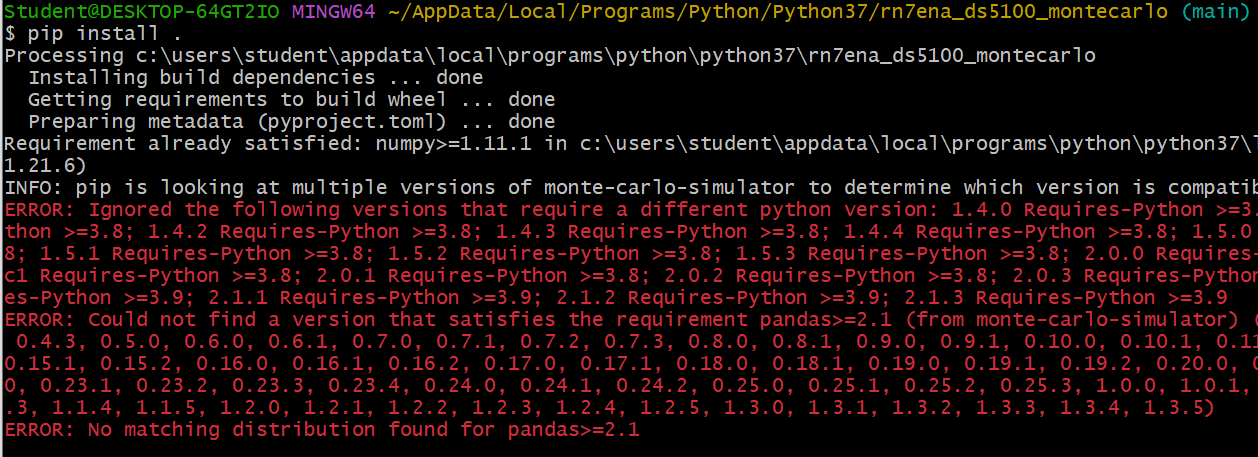

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd

faces = np.array(["H", "T"])
fair = mc.Die(faces)
unfair = mc.Die(faces)
unfair.change_weight("H", 5)
print("Fair: \n", fair.get_state(), sep = "")
print("\nUnfair: \n", unfair.get_state(), sep = "")

Fair: 
      Weight
Face        
H        1.0
T        1.0

Unfair: 
      Weight
Face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
game1 = mc.Game([fair, fair])
game1.play(1000)
game1.get_last_play()

Die #,1,2
Roll #,,
1,H,T
2,T,T
3,T,T
4,H,H
5,H,T
...,...,...
996,H,H
997,T,H
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
game2 = mc.Game([unfair, unfair, fair])
game2.play(1000)
game2.get_last_play()

Die #,1,2,3
Roll #,,,
1,H,H,H
2,H,H,H
3,H,T,H
4,H,H,T
5,H,H,T
...,...,...,...
996,H,H,H
997,H,T,T
998,H,T,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
a1 = mc.Analyzer(game1)
a2 = mc. Analyzer(game2)

print("Game 1 Jackpots:", a1.jackpot())
print("Game 2 Jackpots:", a2.jackpot())

Game 1 Jackpots: 486
Game 2 Jackpots: 366


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [7]:
print("Game 1 relative jackpots", a1.jackpot()/1000)
print("Game 2 relative jackpots", a2.jackpot()/1000)

Game 1 relative jackpots 0.486
Game 2 relative jackpots 0.366


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

([<matplotlib.axis.XTick at 0x7fdc37807dc0>,
 [Text(0, 0, ''), Text(0, 0, '')])

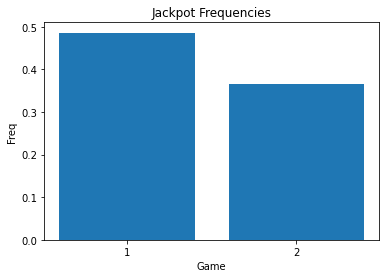

In [8]:
# import myplotlib.pyplot

data1 = pd.DataFrame({"game" : [1, 2], "freq" : [a1.jackpot()/1000, a2.jackpot()/1000]})

# pyplot.bar(data)

import matplotlib.pyplot as plt

plt.bar(data1["game"], data1["freq"])
plt.title("Jackpot Frequencies")
plt.xlabel("Game")
plt.ylabel("Freq")
plt.xticks([1, 2])

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
array = np.array([1, 2, 3, 4, 5, 6])
d1 = mc.Die(array)
d2 = mc.Die(array)
d3 = mc.Die(array)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
d1.change_weight(6, 5)
d1.get_state()

,Weight
Face,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
d2.change_weight(1, 5)
d2.get_state()

,Weight
Face,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
game3 = mc.Game([d3, d3, d3, d3, d3])
game3.play(10000)
game3.get_last_play()

Die #,1,2,3,4,5
Roll #,,,,,
1,1,4,5,6,2
2,5,5,1,1,3
3,1,4,1,5,5
4,5,4,4,5,1
5,2,2,6,1,2
...,...,...,...,...,...
9996,6,6,3,2,4
9997,2,5,5,4,2
9998,4,5,1,2,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
game4 = mc.Game([d1, d2, d3, d3, d3])
game4.play(10000)
game4.get_last_play()

Die #,1,2,3,4,5
Roll #,,,,,
1,6,1,4,3,6
2,6,1,6,3,4
3,6,1,2,6,6
4,5,3,3,2,5
5,2,1,2,6,5
...,...,...,...,...,...
9996,6,1,3,5,2
9997,6,1,1,2,5
9998,6,5,1,3,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Game 3 relative jackpots: 0.008
Game 4 relative jackpots: 0.006
--------------------------------


([<matplotlib.axis.XTick at 0x7fdc36b7ed90>,
 [Text(0, 0, ''), Text(0, 0, '')])

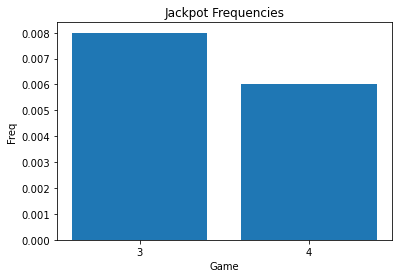

In [16]:
a3 = mc.Analyzer(game3)
a4 = mc.Analyzer(game4)

j3 = a3.jackpot()/1000
j4 = a4.jackpot()/1000

print("Game 3 relative jackpots:", j3)
print("Game 4 relative jackpots:",j4)
print("--------------------------------")

data2 = pd.DataFrame({"game" : [3, 4], "freq" : [j3, j4]})

plt.bar(data2["game"], data2["freq"])
plt.title("Jackpot Frequencies")
plt.xlabel("Game")
plt.ylabel("Freq")
plt.xticks([3, 4])


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
letters = pd.read_table("english_letters.txt", delimiter = " ", header = None, index_col = 0).squeeze()
letters.index.name = "Letter"
letters.name = "Freqs"

d4 = mc.Die(np.array(letters.index.values))

for letter, weight in letters.items():
    d4.change_weight(letter, weight)
    
d4.get_state()

,Weight
Face,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [18]:
g5 = mc.Game([d4, d4, d4, d4])
g5.play(1000)
g5.get_last_play()

Die #,1,2,3,4
Roll #,,,,
1,D,O,T,P
2,O,Y,E,A
3,O,D,L,E
4,N,E,S,I
5,D,E,L,C
...,...,...,...,...
996,N,O,S,Y
997,R,S,A,W
998,B,N,D,Y


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [19]:
a5 = mc.Analyzer(g5)

perms5 = ["".join(tuple) for tuple in a5.perm_counts().index]
vocabulary = [line.rstrip() for line in open("scrabble_words.txt").readlines()]
words5 = [perm for perm in perms5 if perm in vocabulary]

print(words5, "\nCount:", len(words5))

['SASH', 'ORRA', 'ONES', 'HETS', 'LOME', 'GOER', 'LIER', 'SOTH', 'TALA', 'ARCO', 'TEST', 'OAFS', 'TOLT', 'THON', 'DESI', 'ARID', 'TEER', 'ETAT', 'RATA', 'NAAN', 'AITU', 'RIPE', 'SPET', 'ROST', 'COLE', 'DALI', 'APES', 'DINO', 'BRED', 'SORE', 'LOYS', 'MOTE', 'DEEN', 'DELF', 'TRIE', 'IRIS', 'NAIN', 'HOSE', 'BLUE', 'SIES', 'TROT', 'RATU', 'LAYS', 'NOSY'] 
Count: 44


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [20]:
game6 = mc.Game([d4, d4, d4, d4, d4])
game6.play(1000)

a6 = mc.Analyzer(game6)

perms6 = ["".join(tuple) for tuple in a6.perm_counts().index]
words6 = [perm for perm in perms6 if perm in vocabulary]

print(words6, "\nCount:", len(words6))

['HONDA', 'ALTOS', 'MANTY', 'WESTS'] 
Count: 4


The steps produced more words with 4 letters than with 5 letters.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.